In [ ]:
#!pip install openai ydata-profiling

In [ ]:
from openai import OpenAI
import csv
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import random

In [183]:
client = OpenAI(
    api_key="",
)

In [184]:
#https://github.com/openai/openai-python
def generate_conversation(prompt, max_tokens):
    response = client.chat.completions.create(
        #model="gpt-3.5-turbo",#"is the flagship model of this family, supports a 16K context window and is optimized for dialog."
        model="gpt-4-1106-preview",
        messages=prompt,
        max_tokens=max_tokens,
        temperature=0.7
    )
    return response.choices[0].message.content

In [185]:

categories = ['first participant in conversation is deceiving the second one', 
              'second participant in conversation is deceiving the first one', 
              'both participants in conversation are deceiving each other', 
              'none of participants in conversation try to deceive the other one'
             ]

topics = ['a political subject',
          'a diplomacy subject between european coutries',
          'investing in a business', 
          'buying membership of a club' ,
          'discussing past relationships',
          'a job interview',
          'sale or rental of property',
          'insurance claims after an accident',
          'health issues',
          'friends',
          'family wills and inheritances',
          'travel experiences',
          'cooking tips or recipes' # where one might not fully disclose their secret ingredients or techniques,
         ]

In [186]:
dataset = []
number_of_conversations = 5

for _ in range(number_of_conversations):
    # randomly choose a topic
    topic = random.choice(topics)
    for category in categories:
        prompt = [{
            "role": "user",
           "content":f"""Create a long textual conversation about {topic} where {category}.            
            The template should be as follow:
             A: 
             B: 
             and do not use specific names for participants
             and The conversation should be coherent and realistic.
             """
        }]
        conversation = generate_conversation(prompt, 3000)  # roughly number of words
        word_count = len(conversation.split())

        if category == 'first participant in conversation is deceiving the second one':
            A_bad_intent = 1
            B_bad_intent = 0
        elif category == 'second participant in conversation is deceiving the first one':
            A_bad_intent = 0
            B_bad_intent = 1
        elif category == 'both participants in conversation are deceiving each other':
            A_bad_intent = 1
            B_bad_intent = 1
        elif  category == 'none of participants in conversation try to deceive the other one':
            A_bad_intent = 0
            B_bad_intent = 0

        print(category)
        print(topic)
        print(conversation)
        print(word_count)

        # check the desired word limit
        #word_limit = (500, 1000)
        #if word_limit[0] <= word_count <= word_limit[1]:
        dataset.append({'category': category,
                        'conversation': conversation , 
                        'word_count' : word_count,
                        'A_bad_intent' : A_bad_intent ,
                        'B_bad_intent' : B_bad_intent,
                        'description' : '',
                        'topic' : topic
                       })


first participant in conversation is deceiving the second one
travel experiences
A: Hey! I just got back from an amazing trip to Thailand. It was incredible, you wouldn't believe the things I've seen and done!

B: That sounds awesome! I've always wanted to go to Thailand. What was the highlight of your trip?

A: Oh, without a doubt, it was the private dinner I had on top of the Grand Palace in Bangkok. The view was breathtaking, and the king himself stopped by to greet us. It was such an honor!

B: Wait, really? I didn't know you could even have dinner on top of the Grand Palace, let alone have the king stop by. That's amazing!

A: Yeah, it's a very exclusive thing. I have a friend who knows someone in the royal circle, and they arranged the whole thing. We had a full Thai banquet and the place was lit by thousands of lanterns. It was like a fairytale.

B: That sounds like a once-in-a-lifetime experience for sure. What else did you do there?

A: I also joined a secret yoga retreat with

none of participants in conversation try to deceive the other one
travel experiences
A: Hey! I just got back from my trip to Japan. It was absolutely amazing!

B: Oh, that sounds incredible! What part of Japan did you visit?

A: I spent most of my time in Tokyo, but I also took a few days to explore Kyoto and Osaka. The blend of modern and traditional in Tokyo was mind-blowing.

B: I've always wanted to see the cherry blossoms in Japan. Did you manage to catch them in bloom?

A: Yes, I did! I was so lucky with the timing. The cherry blossoms in Ueno Park were in full bloom, and the view was nothing short of magical.

B: That's wonderful! Did you try any interesting food while you were there?

A: Absolutely! I tried takoyaki in Osaka, which is like a savory pancake ball with octopus inside. And in Tokyo, I couldn't get enough of the sushi – it was so fresh.

B: Sounds delicious! How about the language barrier? Did you find it difficult to communicate?

A: I was a bit worried about that,

both participants in conversation are deceiving each other
family wills and inheritances
A: I was thinking about the talk we had the other day about family wills. It's a touchy subject, but I'm glad we can discuss it openly.

B: Absolutely, I agree. It's important to have these conversations. Speaking of which, I heard that the family estate might be divided differently than we initially thought.

A: Oh, really? That's interesting. I hadn't heard any updates. From what I know, the will seemed pretty straightforward with equal shares.

B: Well, you know how these things go. There can always be last-minute changes and surprises. I actually came across some old documents that hinted at a trust fund that nobody seems to remember.

A: A trust fund? That's news to me. I wonder why that's never been brought up before. Maybe it's something that was set up for a specific purpose?

B: Possibly, or it could be one of those old family secrets. Anyway, I'm just trying to ensure everything is fair f

second participant in conversation is deceiving the first one
discussing past relationships
A: Hey, I've been thinking about past relationships lately, and it's been kind of weighing on me. You ever think about your exes?

B: Sometimes, but not too often, I try to keep the past in the past, you know? What's on your mind about it?

A: Just reflecting, I guess. I was with someone for a while and thought it was really serious, but looking back, I can see that there were so many red flags that I ignored.

B: That can be tough. I had a long-term relationship once that I thought was going to be the one. But things just didn't work out for reasons I still don't fully understand.

A: Really? You've never mentioned them before. What happened if you don't mind me asking?

B: Oh, it's a long story. Just the usual, I suppose – we grew apart, had different goals. You know how these things go.

A: Yeah, I get that. But it's weird, I never saw you upset or anything. Did you guys end on good terms?

B

first participant in conversation is deceiving the second one
a diplomacy subject between european coutries
A: I must say, it's been a pleasure working closely with our European partners to address the complex issue of energy security within the region. Our commitment to solidarity is stronger than ever.

B: Indeed, the recent disruptions have shown just how interconnected our economies are, and the need for a unified approach to energy diversification.

A: Absolutely. On that note, we've been exploring some new initiatives that could benefit the entire bloc, particularly in the realm of natural gas exploration.

B: That's encouraging to hear. Given the current geopolitical climate, it's critical we develop self-sustaining energy sources. What kind of initiatives are we discussing?

A: We're considering a proposal for a joint exploration venture that could potentially unlock vast reserves of natural gas. Our preliminary assessments suggest there could be significant untapped resources 

both participants in conversation are deceiving each other
a diplomacy subject between european coutries
A: Greetings, esteemed colleague. I trust you've reviewed the proposed trade agreement between our nations?

B: Indeed, I have. It appears to be quite a comprehensive document. Yet, I can't help but feel that we might be overlooking the potential environmental impact of increasing industrial collaboration.

A: Ah, your concern for the environment is commendable. We've certainly considered this and believe that the economic benefits could potentially finance further environmental protection initiatives. Wouldn't you agree?

B: Absolutely, the economic benefits are clear. However, it's crucial that we don't rush into this without a solid plan for those initiatives. Meanwhile, we've been exploring alternative partnerships that might offer a more balanced approach to economic growth and environmental stewardship.

A: I see. It's interesting that you mention alternative partnerships. In 

first participant in conversation is deceiving the second one
sale or rental of property
A: Hey there! I saw your ad about looking for a property to rent, and I think I have the perfect place for you.

B: Oh, that's great! Can you tell me more about it?

A: Absolutely! It's a spacious two-bedroom apartment right in the heart of the city, with all the amenities you could ask for: a modern gym, a swimming pool, and even a private parking space.

B: That sounds amazing. What's the rent like?

A: It's a steal at just $1500 a month. The place is worth much more, but I'm looking for a tenant quickly.

B: Wow, $1500 is way below the market rate for that area. Are there any additional fees or costs I should know about?

A: Not at all! $1500 is all-inclusive. You won't pay a dime more.

B: Can I arrange a viewing? I'd love to see the place before making any decisions.

A: I'm currently out of town, so I can't show you the apartment in person. But I can send you some pictures and even a video to

none of participants in conversation try to deceive the other one
sale or rental of property
A: Good morning, I saw your listing for the house on Pine Street and I'm interested in learning more about it. Is it still available for sale?

B: Good morning! Yes, the house on Pine Street is still available for sale. I'd be happy to provide you with more information. What would you like to know?

A: I appreciate that, thanks. Could you tell me more about the size of the house and any recent renovations that have been done?

B: Of course. The house is a four-bedroom, three-bathroom property with approximately 2,500 square feet of living space. We recently updated the kitchen with new appliances and granite countertops, and the bathrooms have been modernized as well.

A: That sounds great. What about the outdoor space? Is there a yard or garden?

B: Yes, there's a sizable backyard with a patio area and a garden. It's quite private as we've added new fencing last year. There's also a two-car ga

In [187]:
# save the dataset
with open('conversation_dataset.csv', 'a+', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['category', 'conversation',  'word_count', 'A_bad_intent' , 'B_bad_intent', 'description', 'topic'])
    #writer.writeheader()
    writer.writerows(dataset)

In [188]:
df = pd.read_csv('conversation_dataset.csv')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      188 non-null    object 
 1   conversation  188 non-null    object 
 2   word_count    188 non-null    int64  
 3   A_bad_intent  188 non-null    float64
 4   B_bad_intent  188 non-null    float64
 5   description   10 non-null     object 
 6   topic         80 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 10.4+ KB


In [190]:
df

,category,conversation,word_count,A_bad_intent,B_bad_intent,description,topic
0,first participant in conversation is deceiving...,"A: Hey, I have something really important to t...",437,1.0,0.0,NaN,NaN
1,second participant in conversation is deceivin...,"A: Hey Sarah, I heard you recently went on a t...",368,0.0,1.0,NaN,NaN
2,both participants in conversation are deceivin...,"A: Hey, how have you been? It's been a while s...",400,1.0,1.0,NaN,NaN
3,none of participants in conversation try to de...,A: Hey Sarah! How was your weekend?\n\nB: Hi M...,494,0.0,0.0,NaN,NaN
4,first participant in conversation is deceiving...,A: Hey there! How are you doing today?\n\nB: H...,534,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
183,none of participants in conversation try to de...,"A: Good morning, I think we should begin by ad...",681,0.0,0.0,NaN,a diplomacy subject between european coutries
184,first participant in conversation is deceiving...,A: Hey there! I saw your ad about looking for ...,476,1.0,0.0,NaN,sale or rental of property
185,second participant in conversation is deceivin...,A: Hello! I saw your listing for the house ren...,550,0.0,1.0,NaN,sale or rental of property
186,both participants in conversation are deceivin...,A: Hello there! I saw your ad online about the...,544,1.0,1.0,NaN,sale or rental of property


In [191]:
df['topic'].unique()

array([nan, 'a job interview', 'friends', 'sale or rental of property',
       'family wills and inheritances', 'cooking tips or recipes',
       'insurance claims after an accident', 'travel experiences',
       'discussing past relationships',
       'a diplomacy subject between european coutries'], dtype=object)

In [ ]:
#ProfileReport(df)

<Axes: ylabel='word_count'>

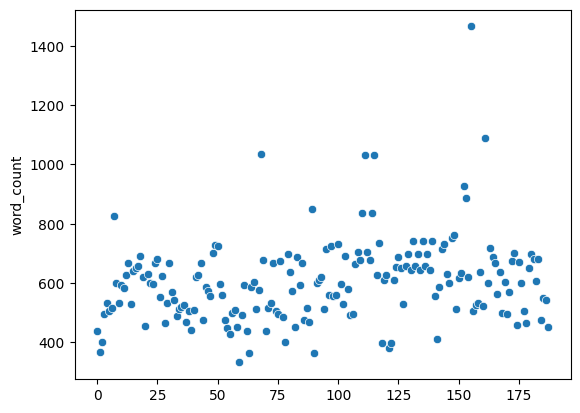

In [192]:
sns.scatterplot(df['word_count'])

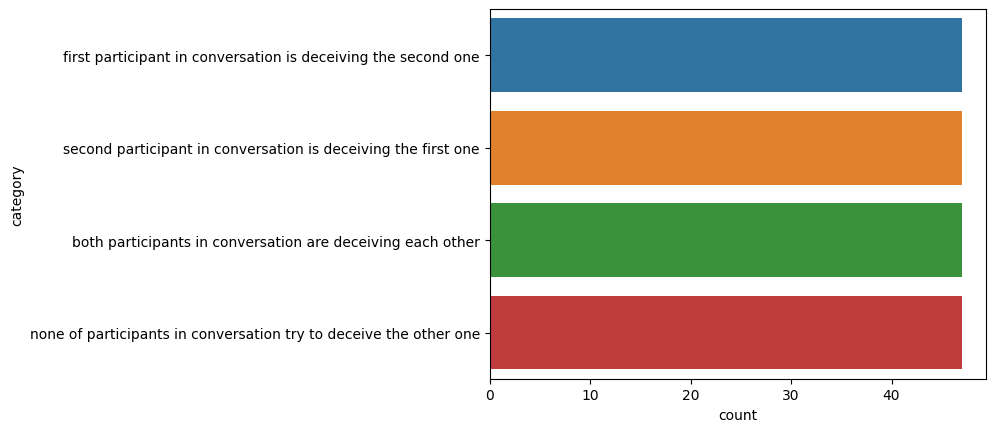

In [193]:
ax = sns.countplot(df, y = 'category')

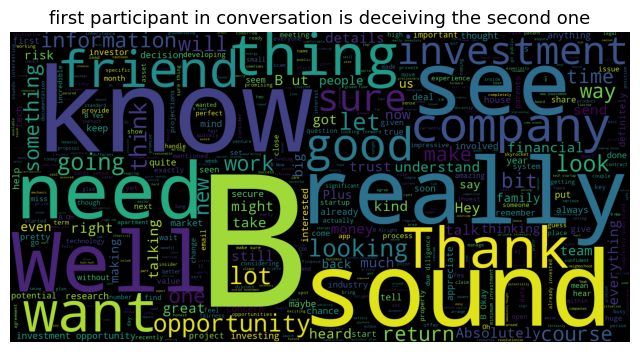

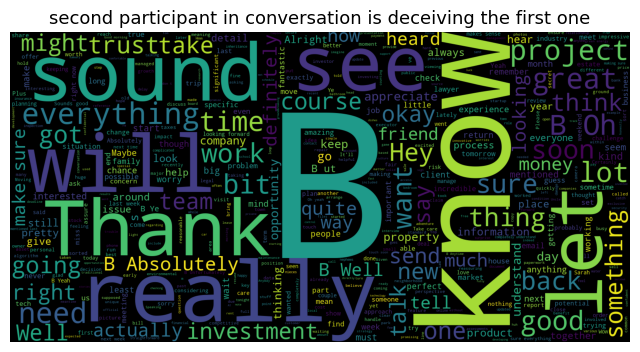

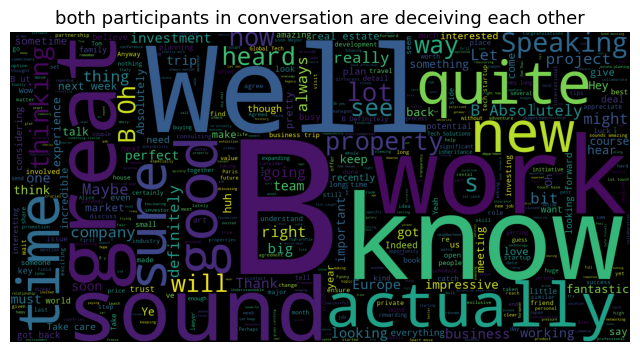

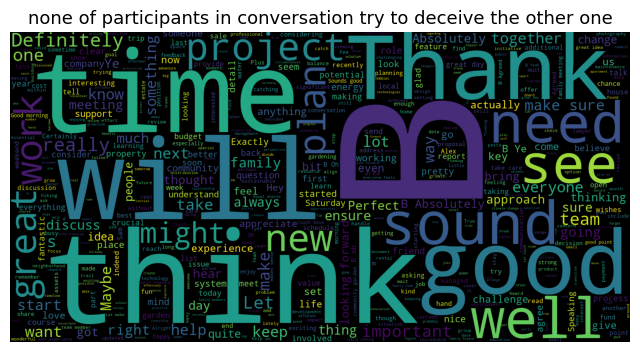

In [194]:
for title in df['category'].unique(): 
    data = df[df['category'] == title]['conversation']
    wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(data))  
    plt.figure(figsize = (8,6))
    plt.axis("off")
    plt.imshow(wc)
    plt.title(title,fontsize=13)
    plt.show()
    plt.close()
    

### There are some descriptions at the end of each conversation that must be removed!!!

In [195]:
# extracting the descriptions in parentheses and creating a new column 'description            
for i, j in df.iterrows():
    #if pd.isna(j['description']):
    match = pd.Series(j['conversation']).str.extract(r'\(([^)]+)\)$')
    if not match.isna().all().all():  # Check if there was a match
        df.loc[i,'description'] = match.iloc[0, 0]
    # removing the descriptions from the 'conversation' column
    df.loc[i,'conversation'] = pd.Series(j['conversation']).replace(r'\([^)]+\)$', '', regex=True).iloc[0].strip()  
       

In [196]:
df['description'].unique().tolist()

[nan,
 'Both A and B were deceiving each other throughout the conversation – A is not actually close to publishing a novel and B is not involved in a significant business deal or company expansion.',
 'Note: This conversation is fictional and is designed to illustrate how one participant might deceive another on a political subject. In reality, many of the claims made by participant A are misleading or false, and the conversation simplifies complex issues regarding voter legislation. It is essential to fact-check and research independently to understand the full context and implications of such legislation.',
 'Note: In this conversation, Participant B is misleading Participant A by suggesting that the environmental bill has loopholes and is less effective than it appears, without providing concrete evidence or sources. Participant A is rightfully skeptical and intends to conduct further research, illustrating the importance of verifying information and not taking claims at face value.

In [197]:
df

,category,conversation,word_count,A_bad_intent,B_bad_intent,description,topic
0,first participant in conversation is deceiving...,"A: Hey, I have something really important to t...",437,1.0,0.0,NaN,NaN
1,second participant in conversation is deceivin...,"A: Hey Sarah, I heard you recently went on a t...",368,0.0,1.0,NaN,NaN
2,both participants in conversation are deceivin...,"A: Hey, how have you been? It's been a while s...",400,1.0,1.0,NaN,NaN
3,none of participants in conversation try to de...,A: Hey Sarah! How was your weekend?\n\nB: Hi M...,494,0.0,0.0,NaN,NaN
4,first participant in conversation is deceiving...,A: Hey there! How are you doing today?\n\nB: H...,534,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
183,none of participants in conversation try to de...,"A: Good morning, I think we should begin by ad...",681,0.0,0.0,NaN,a diplomacy subject between european coutries
184,first participant in conversation is deceiving...,A: Hey there! I saw your ad about looking for ...,476,1.0,0.0,NaN,sale or rental of property
185,second participant in conversation is deceivin...,A: Hello! I saw your listing for the house ren...,550,0.0,1.0,NaN,sale or rental of property
186,both participants in conversation are deceivin...,A: Hello there! I saw your ad online about the...,544,1.0,1.0,NaN,sale or rental of property


In [198]:
df['conversation'] = df['conversation'].str.replace(r'(\(.*\)$|[End of conversation].*$)', '', regex=True).str.strip()

In [199]:
#df['conversation'] = df['conversation'].str.replace(r'(\(.*\)$|\[.*$)', '', regex=True).str.strip()

In [200]:
#print(df.loc[8]['conversation'])

In [201]:
df.to_csv('conversation_dataset.csv', index = False)